# Waiter's Tip Prediction

## Team Members:

BATTULA BHARAT CHANDRA - CB.EN.U4CSE21111

ZAKEER AHAMAD SHAIK - CB.EN.U4CSE21155

VAKADA ROHIT - CB.EN.U4CSE21165

YOGA SAI GOWTHAM VELUGURI - CB.EN.U4CSE21166


### Importing Libraries

In [132]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
data = pd.read_excel("waiter_tip.xlsx")
data

,total_bill,tip,sex,smoker,day,time,size
0,13.45,2.11,Male,Yes,Sat,Lunch,3
1,11.56,3.20,Male,No,Sun,Dinner,4
2,9.65,3.50,Male,No,Thur,Lunch,1
3,20.36,4.20,Male,Yes,Fri,Lunch,5
4,31.20,1.56,Female,No,Fri,Dinner,3
...,...,...,...,...,...,...,...
2056,29.03,5.92,Male,No,Sat,Dinner,3
2057,27.18,2.00,Female,Yes,Sat,Dinner,2
2058,22.67,NaN,Male,Yes,Sat,Dinner,2
2059,17.82,NaN,Male,No,Sat,Dinner,2


### Data Preprocessing

In [134]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [135]:
data.index

RangeIndex(start=0, stop=2061, step=1)

In [136]:
data.shape

(2061, 7)

In [137]:
data.describe()

,total_bill,tip,size
count,2061.000000,2058.000000,2061.000000
mean,17.663353,2.906717,3.862688
std,5.518425,0.927100,1.982464
min,5.750000,1.000000,1.000000
25%,13.780000,2.100000,2.000000
50%,16.890000,2.800000,4.000000
75%,19.870000,3.700000,6.000000
max,53.270000,8.000000,9.000000


In [138]:
data.info

<bound method DataFrame.info of       total_bill   tip     sex smoker   day    time  size
0          13.45  2.11    Male    Yes   Sat   Lunch     3
1          11.56  3.20    Male     No   Sun  Dinner     4
2           9.65  3.50    Male     No  Thur   Lunch     1
3          20.36  4.20    Male    Yes   Fri   Lunch     5
4          31.20  1.56  Female     No   Fri  Dinner     3
...          ...   ...     ...    ...   ...     ...   ...
2056       29.03  5.92    Male     No   Sat  Dinner     3
2057       27.18  2.00  Female    Yes   Sat  Dinner     2
2058       22.67   NaN    Male    Yes   Sat  Dinner     2
2059       17.82   NaN    Male     No   Sat  Dinner     2
2060       18.78   NaN  Female     No  Thur  Dinner     2

[2061 rows x 7 columns]>

In [139]:
data.describe(include = ['object'])

,sex,smoker,day,time
count,2061,2061,2061,2061
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,1112,1046,540,1105


In [140]:
data.isnull().sum().to_frame()

,0
total_bill,0
tip,3
sex,0
smoker,0
day,0
time,0
size,0


In [141]:
# Dropping rows with null values
data.dropna(inplace=True)

data.isnull().sum().to_frame()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [142]:
print(data)

      total_bill   tip     sex smoker   day    time  size
0          13.45  2.11    Male    Yes   Sat   Lunch     3
1          11.56  3.20    Male     No   Sun  Dinner     4
2           9.65  3.50    Male     No  Thur   Lunch     1
3          20.36  4.20    Male    Yes   Fri   Lunch     5
4          31.20  1.56  Female     No   Fri  Dinner     3
...          ...   ...     ...    ...   ...     ...   ...
2053       12.60  1.00    Male    Yes   Sat  Dinner     2
2054       32.83  1.17    Male    Yes   Sat  Dinner     2
2055       35.83  4.67  Female     No   Sat  Dinner     3
2056       29.03  5.92    Male     No   Sat  Dinner     3
2057       27.18  2.00  Female    Yes   Sat  Dinner     2

[2058 rows x 7 columns]


In [143]:
data.drop_duplicates(keep='first')
data.shape


(2058, 7)

### Feature Engineering

In [144]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming dataset is stored in a variable called 'df'
df = pd.DataFrame(data)

# Convert categorical variables like 'sex' and 'smoker' to numerical using Label Encoding
label_encoder = LabelEncoder()

# Convert 'sex' and 'smoker' columns to strings before applying LabelEncoder
df['sex'] = df['sex'].astype(str)
df['smoker'] = df['smoker'].astype(str)
df['day'] = df['day'].astype(str)
df['time'] = df['time'].astype(str)

df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])
df['day_encoded'] = label_encoder.fit_transform(df['day'])
df['time_encoded'] = label_encoder.fit_transform(df['time'])

#drop the non-numeric columns
df.drop(columns=['sex','smoker','day','time'], axis = 1, inplace= True)

# Print the modified dataset
print("Modified Dataset:")
print(df.head())

# If you want to separate features (X) and target variable (y)
X = df.drop('tip', axis=1)
y = df['tip']

# Print the features and target variable
print("\nFeatures (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

Modified Dataset:
   total_bill   tip  size  sex_encoded  smoker_encoded  day_encoded  \
0       13.45  2.11     3            1               1            1   
1       11.56  3.20     4            1               0            2   
2        9.65  3.50     1            1               0            3   
3       20.36  4.20     5            1               1            0   
4       31.20  1.56     3            0               0            0   

   time_encoded  
0             1  
1             0  
2             1  
3             1  
4             0  

Features (X):
   total_bill  size  sex_encoded  smoker_encoded  day_encoded  time_encoded
0       13.45     3            1               1            1             1
1       11.56     4            1               0            2             0
2        9.65     1            1               0            3             1
3       20.36     5            1               1            0             1
4       31.20     3            0               0    

### Feature Selection

In [145]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import chi2

# Drop the target variable (tip in this case) 
X = df.drop(['tip'], axis=1)

# Target variable
y = df['tip']

X=X.astype(int)
X=abs(X)
# Feature selection using SelectKBest and f_regression
# Set k to 'all' to select all available features
selector = SelectKBest(f_regression, k=3)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]

# Display the selected features
print("Selected Features:", selected_features)


Selected Features: Index(['total_bill', 'sex_encoded', 'time_encoded'], dtype='object')


In [146]:
fit=selector.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureSelected=pd.concat([dfcolumns,dfscores],axis=1)
featureSelected.columns=['features','tip']
print(featureSelected.nlargest(11,'tip'))

         features        tip
0      total_bill  82.310555
2     sex_encoded   0.989540
5    time_encoded   0.661179
3  smoker_encoded   0.478888
1            size   0.297453
4     day_encoded   0.205588


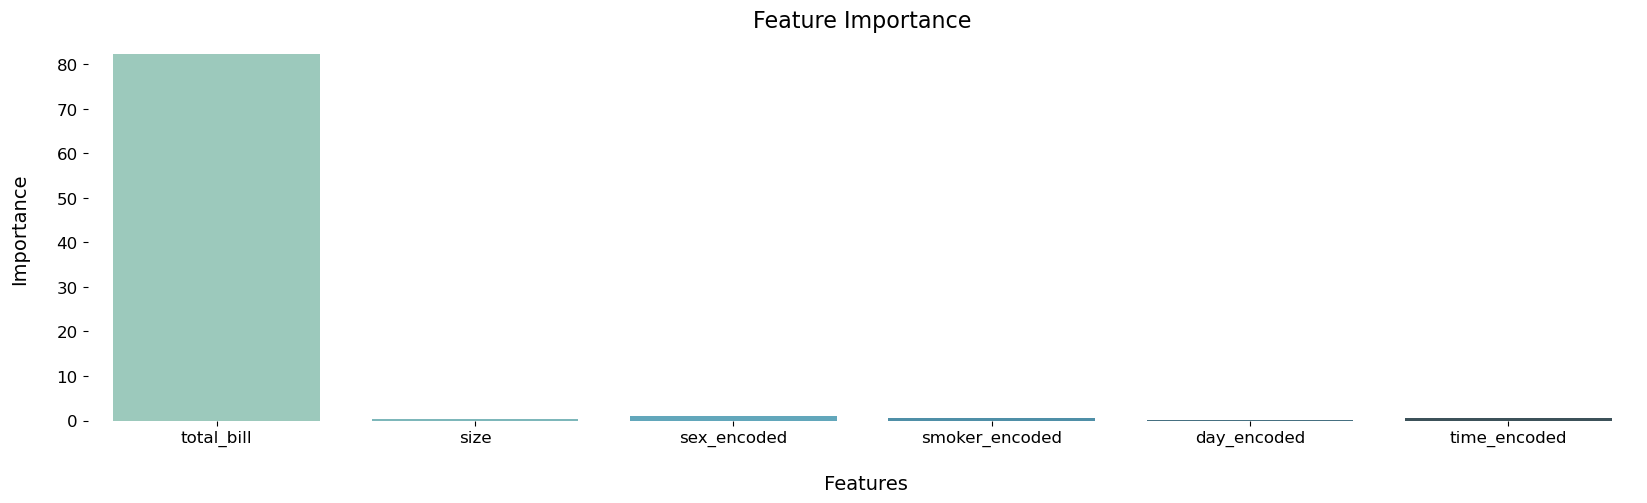

In [147]:
#Feature Selection
plt.figure(figsize=(20,5))
sns.barplot(x='features',y='tip',data=featureSelected,palette='GnBu_d')
plt.box(False)
plt.title('Feature Importance',fontsize=16)
plt.xlabel('\n Features',fontsize=14)
plt.ylabel('Importance\n',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Correlation Heatmap

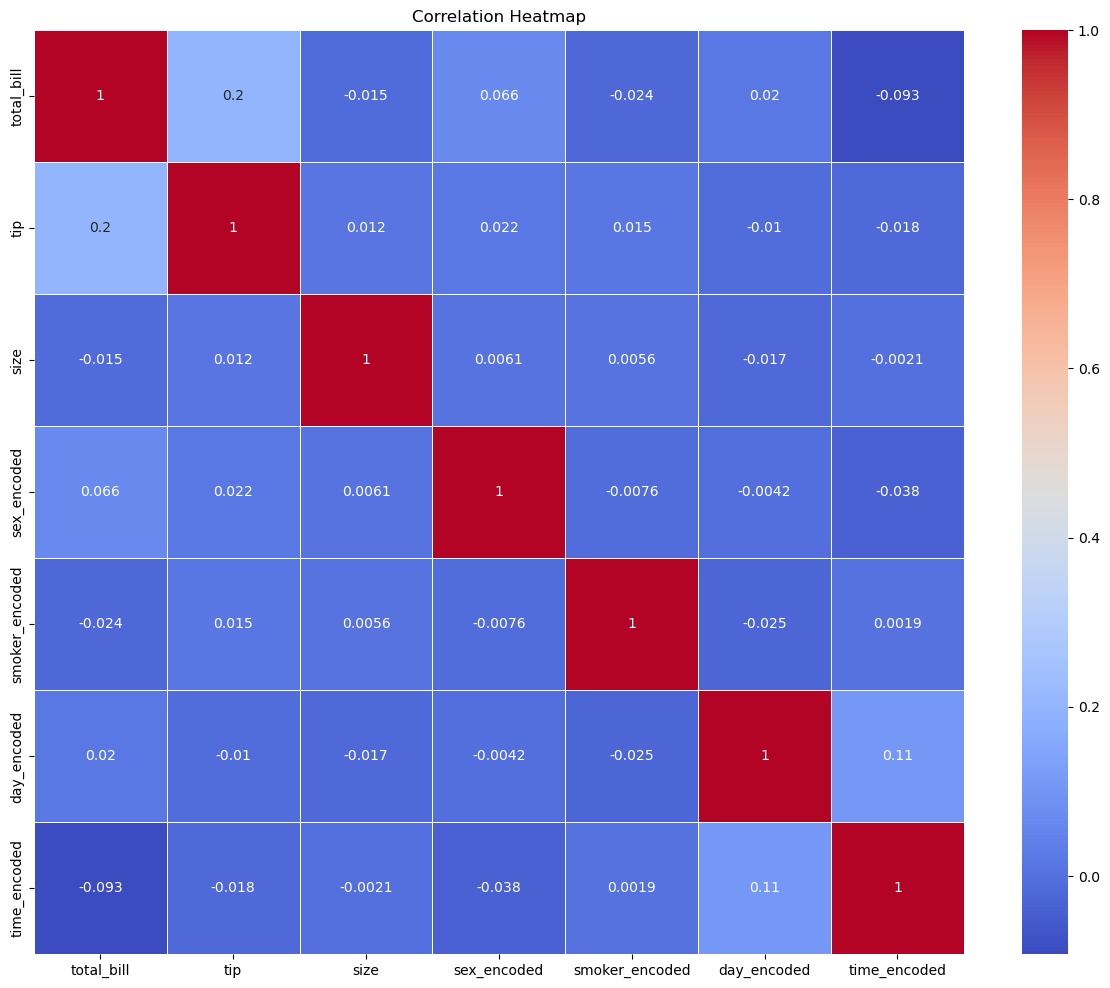

In [148]:
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Visualization

In [149]:
df["index"] = range(1,len(df)+1)
df

,total_bill,tip,size,sex_encoded,smoker_encoded,day_encoded,time_encoded,index
0,13.45,2.11,3,1,1,1,1,1
1,11.56,3.20,4,1,0,2,0,2
2,9.65,3.50,1,1,0,3,1,3
3,20.36,4.20,5,1,1,0,1,4
4,31.20,1.56,3,0,0,0,0,5
...,...,...,...,...,...,...,...,...
2053,12.60,1.00,2,1,1,1,0,2054
2054,32.83,1.17,2,1,1,1,0,2055
2055,35.83,4.67,3,0,0,1,0,2056
2056,29.03,5.92,3,1,0,1,0,2057


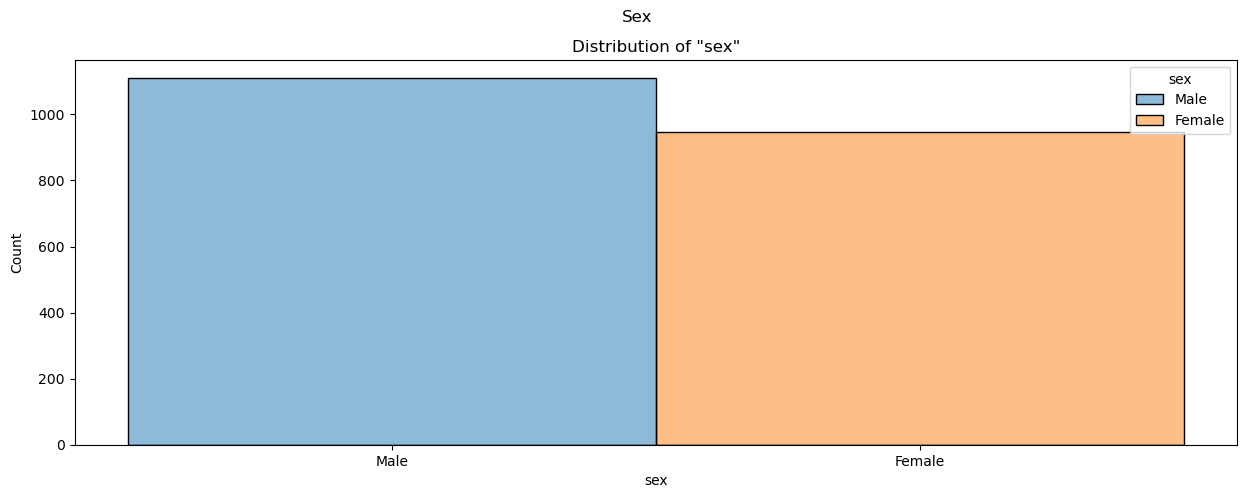

In [150]:
fig, ax = plt.subplots(ncols=1, figsize=(15,5))

fig.suptitle('Sex')

sns.histplot(x='sex', data=data, hue='sex', ax=ax)
# sns.boxplot(x='sex', y='tip', hue='sex', data=data, ax=ax[1])

ax.set_title('Distribution of "sex"')
# ax[1].set_title('Relationship of "sex" and "tips"')

plt.show()

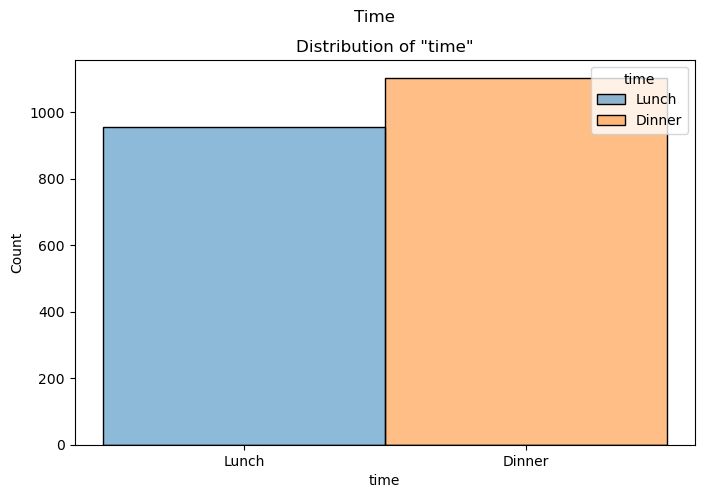

In [151]:
fig, ax = plt.subplots(ncols=1, figsize=(8,5))

fig.suptitle('Time')

sns.histplot(x='time', data=data, hue='time')

ax.set_title('Distribution of "time"')

plt.show()

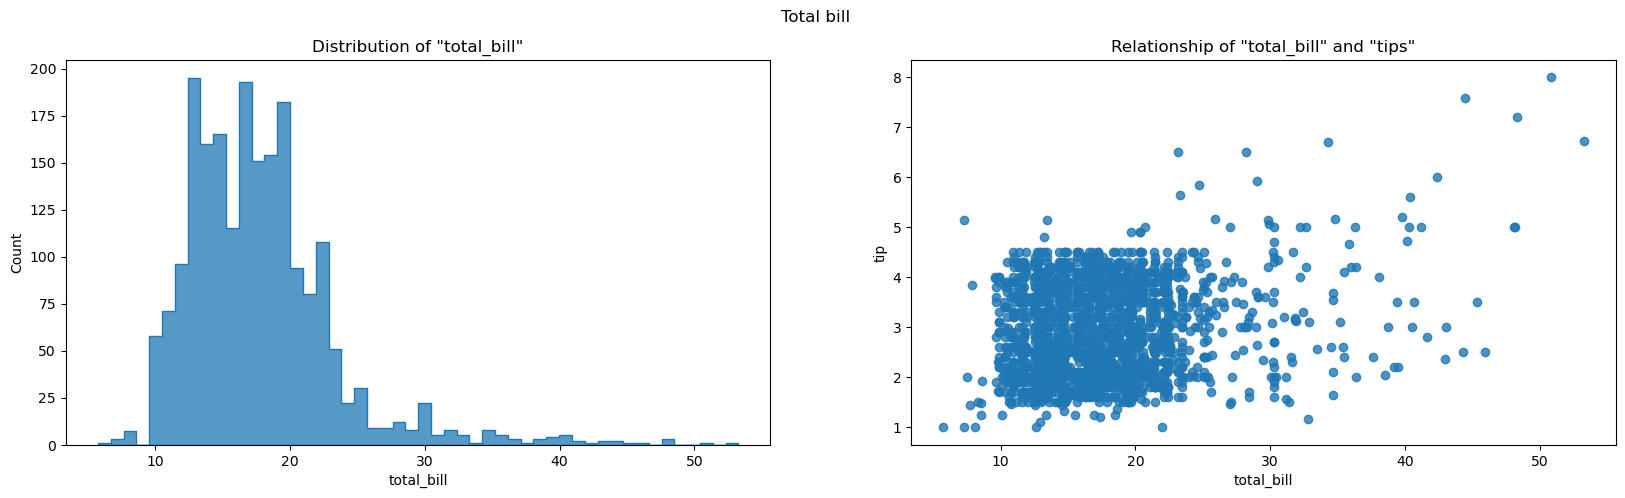

In [152]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Total bill')

sns.histplot(x='total_bill', data=data, element='step', ax=ax[0])
sns.regplot(x='total_bill', y='tip', data=data, fit_reg=False, ax=ax[1])

ax[0].set_title('Distribution of "total_bill"')
ax[1].set_title('Relationship of "total_bill" and "tips"')

plt.show()

In [153]:
figure = px.pie(data, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

In [154]:
figure = px.scatter(data_frame = data,x = "total_bill",y = "tip",color ="day",size="size",trendline="ols")
figure.show()

In [155]:
figure= px.scatter(data_frame= data,x = "total_bill",y = "tip",color ="sex",size="size",trendline="ols")
figure.show()

In [156]:
figure = px.scatter(data_frame = data, x="total_bill", y="tip", size="size", color= "time", trendline="ols")
figure.show()

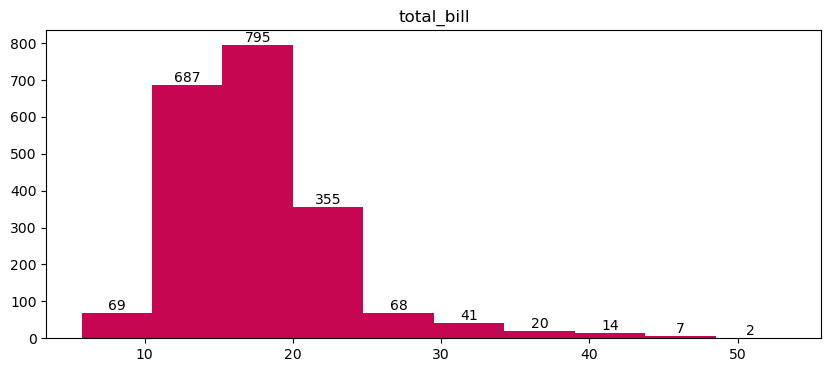

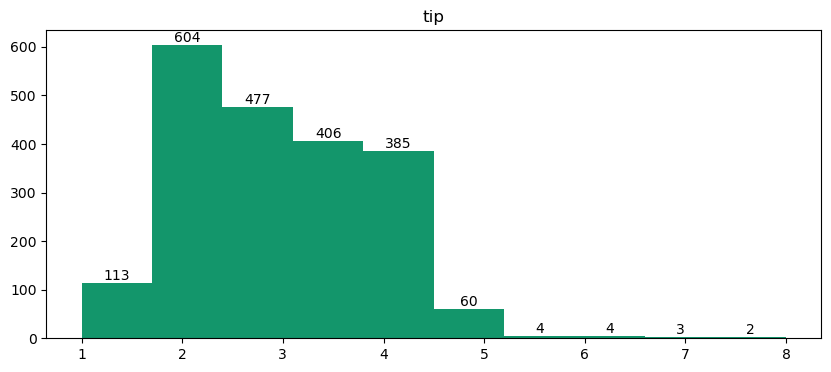

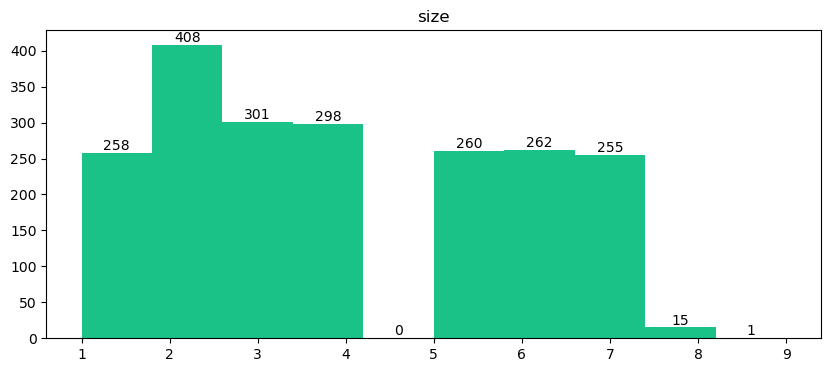

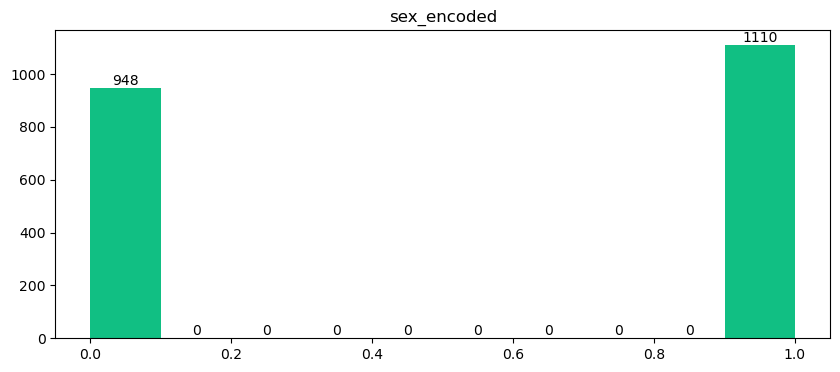

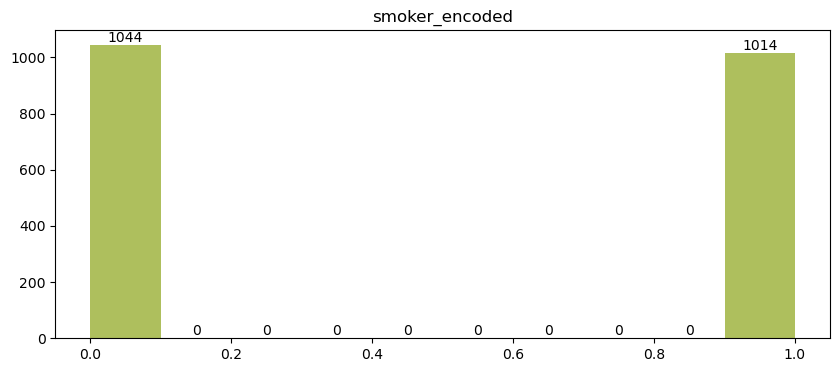

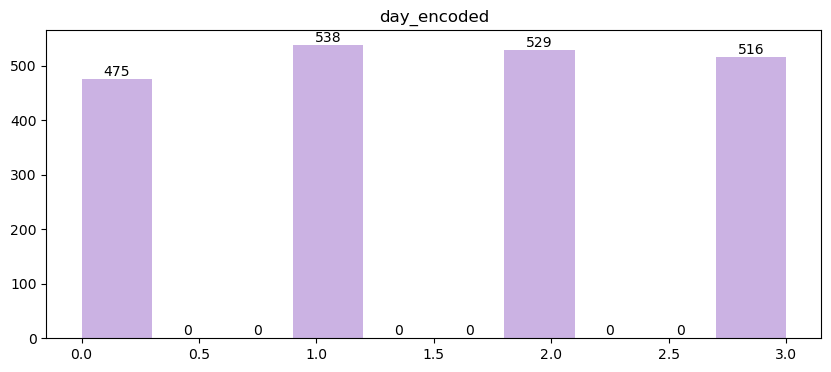

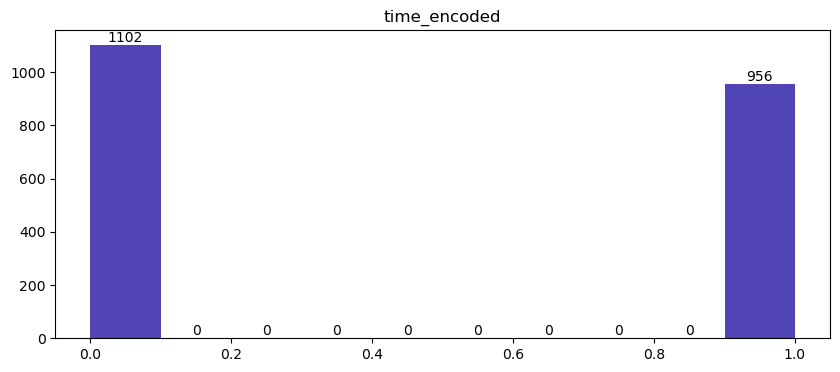

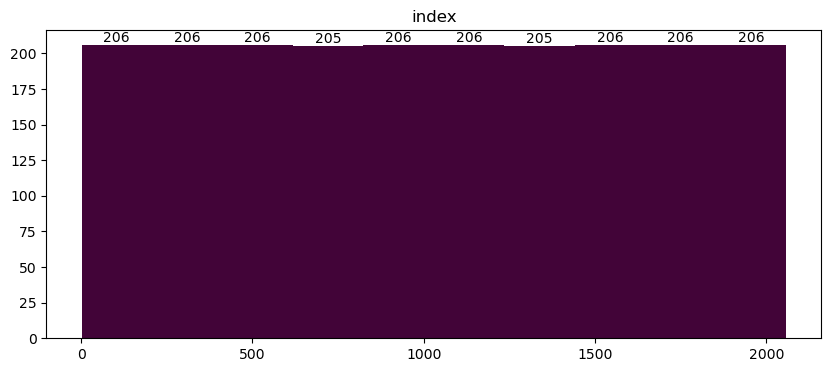

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Loop through the columns in your DataFrame
for column in df.columns:
    plt.figure(figsize=(10, 4))
    plt.title(column)

    # Generate a random RGB color
    random_color = np.random.rand(3)

    # Create a histogram
    counts, bins, patches = plt.hist(df[column], color=random_color)

    # Add count labels on top of each bar
    for count, bin_val, patch in zip(counts, bins, patches):
        x = bin_val + (bins[1] - bins[0]) / 2
        y = count
        plt.text(x, y, str(int(count)), ha='center', va='bottom')

    plt.show()


# Linear Regression

### Calculating Coefficient 

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['total_bill']].values
y = df['tip'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# Printing coefficients and intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Printing the score of the model
print("Model Score:", regressor.score(X_test, y_test))



Coefficients: [0.03154363]
Intercept: 2.3526679145392606
Model Score: 0.0500921218067919


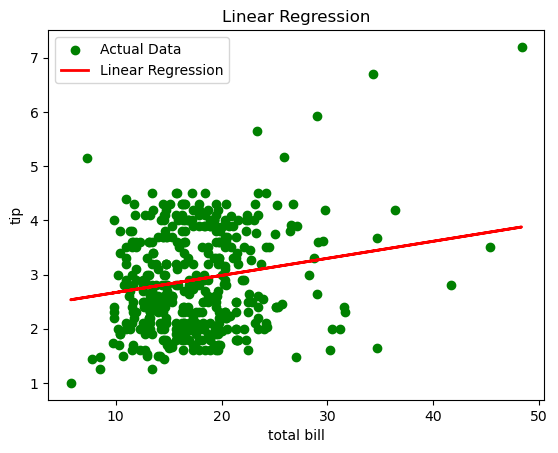

In [159]:
# Plotting the linear regression
plt.scatter(X_test, y_test, color='green', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('total bill')
plt.ylabel('tip')
plt.legend()
plt.show()

### Evaluation Metrics

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['total_bill']].values
y = df['tip'].values

X_train, X_test, y_train, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
rmse = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

print(f'Mean Absolute Error: {mae_lr:.2f}')
print(f'Mean Squared Error: {mse_lr:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared (R²): {r2_lr:.2f}')


Mean Absolute Error: 0.78
Mean Squared Error: 0.84
Root Mean Squared Error: 0.92
R-squared (R²): 0.05


### Gradient Descent

In [161]:
import numpy as np
import matplotlib.pyplot as plt

X = df['total_bill'].values
y = df['tip'].values
m = len(y)

X = (X - np.mean(X)) / np.std(X)

theta0 = 0
theta1 = 0

alpha = 0.01
iterations = 1000

for _ in range(iterations):
    y_pred = theta0 + theta1 * X
    theta0 -= alpha * (1/m) * np.sum(y_pred - y)
    theta1 -= alpha * (1/m) * np.sum((y_pred - y) * X)

print("Theta 0:", theta0)
print("Theta 1:", theta1)


Theta 0: 2.906591714558735
Theta 1: 0.18334125625649894


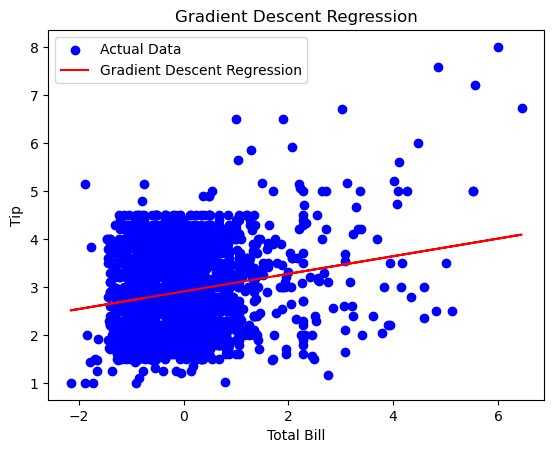

In [162]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, theta0 + theta1 * X, color='red', label='Gradient Descent Regression')
plt.title('Gradient Descent Regression')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.show()

### Evaluation Metrics

In [163]:
y_pred_final = theta0 + theta1 * X
mae = mean_absolute_error(y, y_pred_final)
mse = mean_squared_error(y, y_pred_final)
rmse = np.sqrt(mse)
r2_gd1 = r2_score(y, y_pred_final)

print("Evaluation Metrics:")
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared (R²): {r2_gd1:.2f}')


Evaluation Metrics:
Mean Absolute Error: 0.78
Mean Squared Error: 0.83
Root Mean Squared Error: 0.91
R-squared (R²): 0.04


#### Bias Trade off

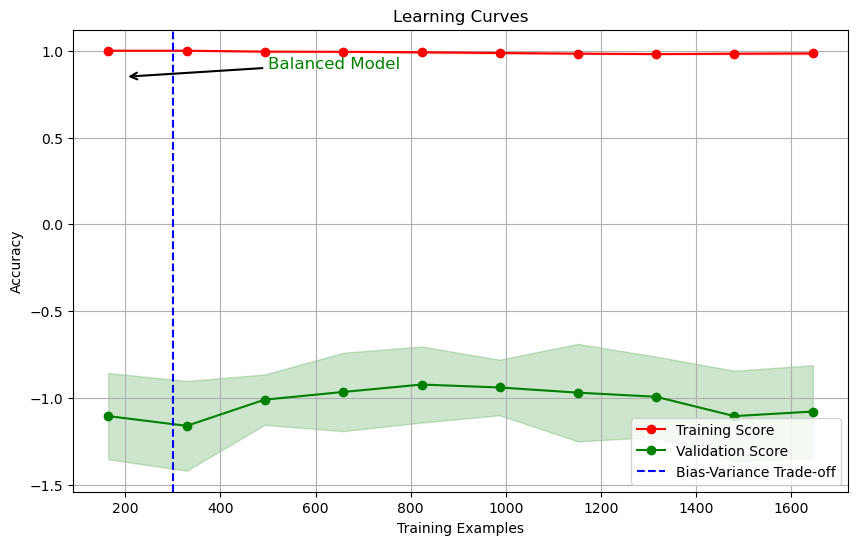

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor


X = df[['total_bill', 'sex_encoded', 'smoker_encoded', 'day_encoded', 'time_encoded', 'size']]  # Features
y = df['tip']  

# Define a base classifier (Decision Tree in this example)
base_classifier = DecisionTreeRegressor(random_state=42)

# Create learning curves
train_sizes, train_scores, test_scores = learning_curve(
    base_classifier, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Create a plot to visualize the learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot the mean training and validation scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Score")

# Plot the standard deviations as shaded regions
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    color="r",
    alpha=0.2,
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    color="g",
    alpha=0.2,
)

# Plot the bias-variance trade-off line (adjust as needed)
plt.axvline(300, color='blue', linestyle='--', label='Bias-Variance Trade-off')

plt.legend(loc="best")

# Annotate the graph with overfitting, underfitting, or balanced model
plt.annotate('Balanced Model', xy=(200, 0.85), xytext=(500, 0.9),
             arrowprops=dict(arrowstyle='->', lw=1.5),
             fontsize=12, color='green')

plt.show()

### Decision Tree

Mean Squared Error: 1.7778245533980581


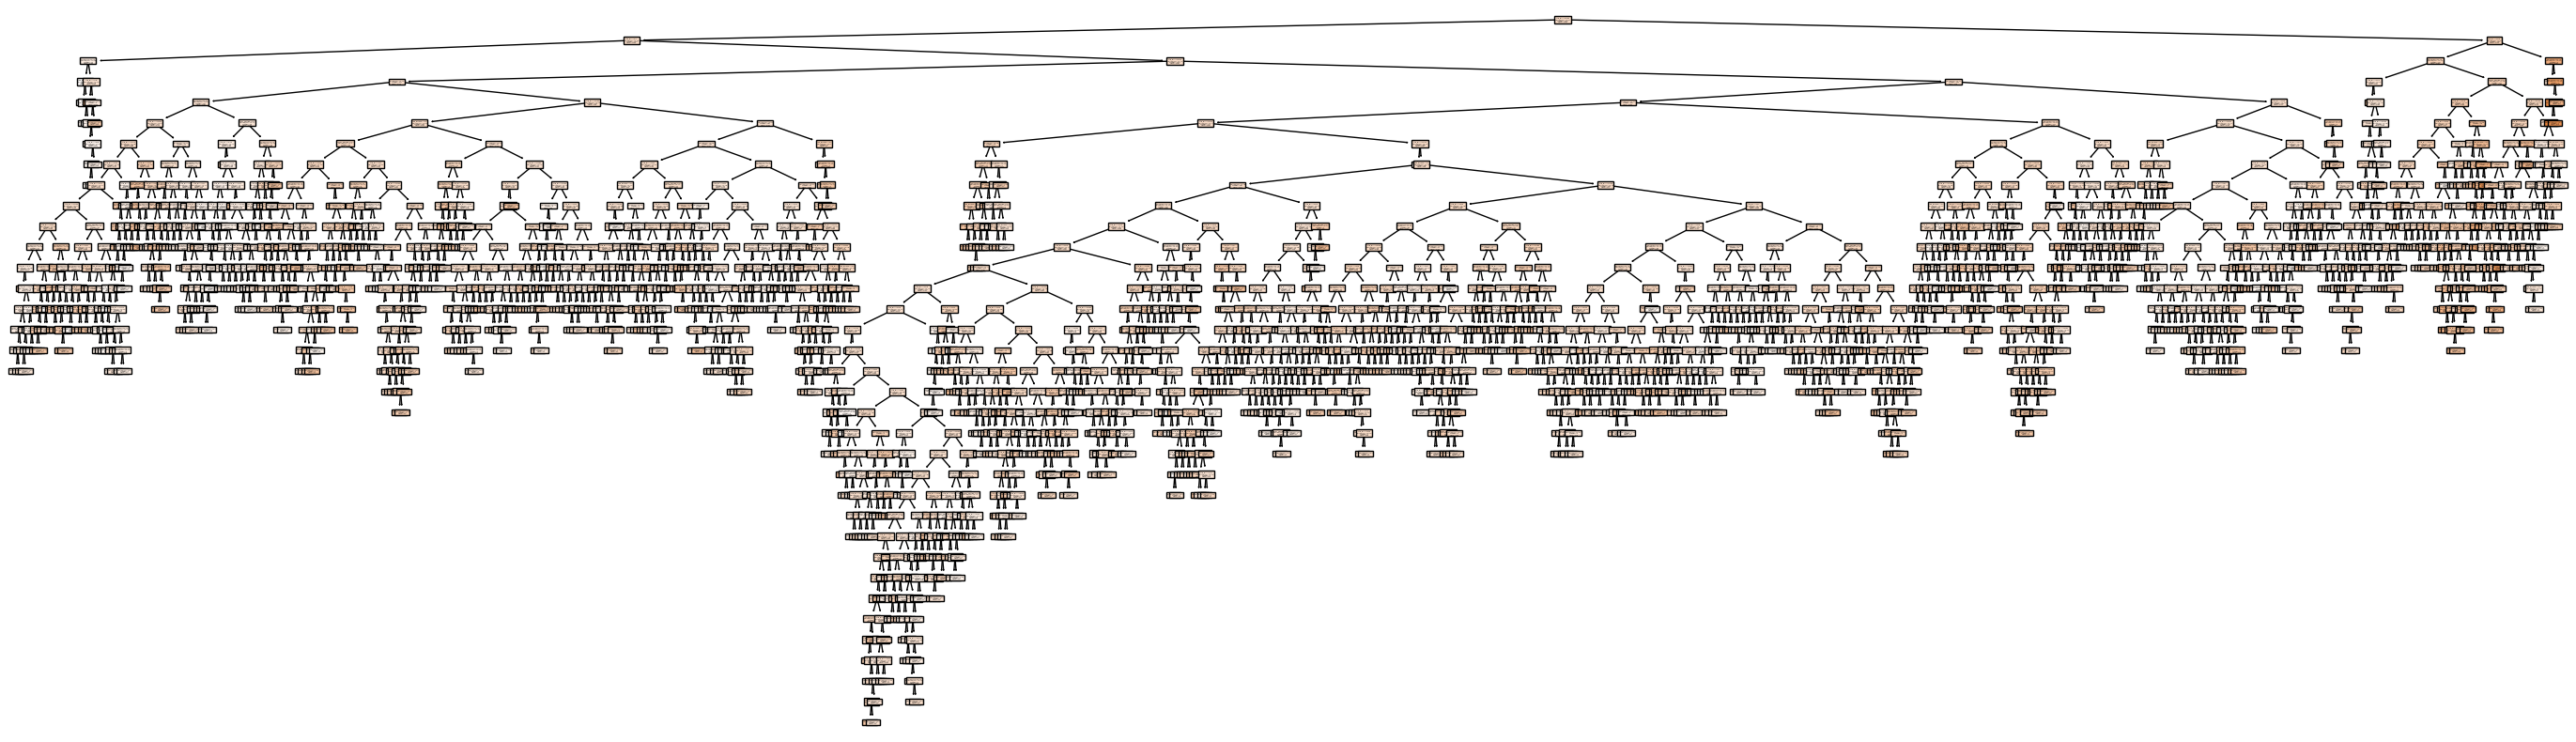

In [169]:
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(data)

# Encode categorical variables
label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])
df['day_encoded'] = label_encoder.fit_transform(df['day'])
df['time_encoded'] = label_encoder.fit_transform(df['time'])

# Define the features and target variable
X = df[['total_bill', 'sex_encoded', 'smoker_encoded', 'day_encoded', 'time_encoded', 'size']]
y = df['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Calculate and print the mean squared error (MSE)
mse_dt = mean_squared_error(y_test_dt, y_pred_dt)
print(f"Mean Squared Error: {mse_dt}")

# Print the decision tree
plt.figure(figsize=(35, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns)  # Updated this line
plt.show()


Selected Features: Index(['total_bill', 'sex_encoded', 'time_encoded'], dtype='object')
Mean Squared Error (Selected Features): 1.1364587498995553


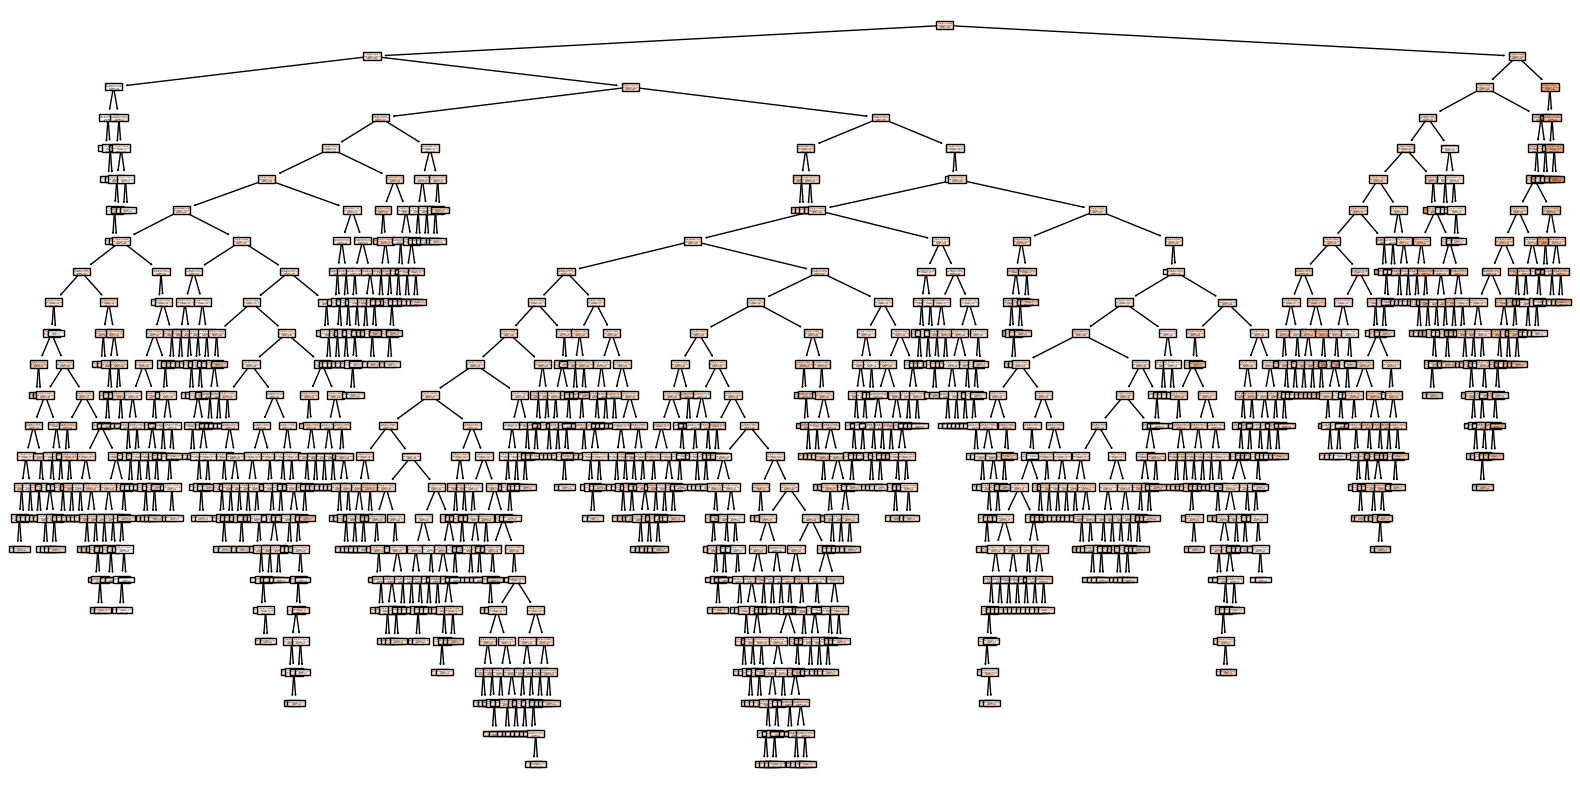

In [170]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression


# Feature selection using SelectKBest and f_regression
selector = SelectKBest(f_regression, k=3)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]

# Display the selected features
print("Selected Features:", selected_features)

# Transform X to keep only the selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create and fit the decision tree regressor using selected features
dt_regressor_selected = DecisionTreeRegressor(random_state=42)
dt_regressor_selected.fit(X_train_sel, y_train_sel)

# Make predictions on the test set
y_pred_dt_selected = dt_regressor_selected.predict(X_test_sel)

# Calculate and print the mean squared error (MSE) using selected features
mse_dt_selected = mean_squared_error(y_test_sel, y_pred_dt_selected)
print(f"Mean Squared Error (Selected Features): {mse_dt_selected}")

# Print the decision tree for selected features
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor_selected, filled=True, feature_names=selected_features)
plt.show()


### Evaluation Metrics

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate and print the mean absolute error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"Mean Absolute Error (MAE): {mae_dt}")

# Calculate and print the mean squared error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error (MSE): {mse_dt}")

# Calculate and print the R-squared (R^2) score
r2_dt = r2_score(y_test, y_pred_dt)
print(f"R-squared (R^2) Score: {r2_dt}")


Mean Absolute Error (MAE): 1.084985436893204
Mean Squared Error (MSE): 1.8144250388349517
R-squared (R^2) Score: -1.042704247062808


### HyperParameter Tuning

In [119]:
%%capture
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have your feature matrix X and target vector y
# Replace X and y with your actual feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_


# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate the mean squared error of the best model
mse = mean_squared_error(y_test, y_pred)



In [120]:
print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error of the best model: {mse}")

Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error of the best model: 1.0586142723603909


### Random Forest

Mean Absolute Error: 0.8151421737063137
Mean Squared Error: 0.9687686446005547
R-squared (R2) Score: -0.0862791859528329


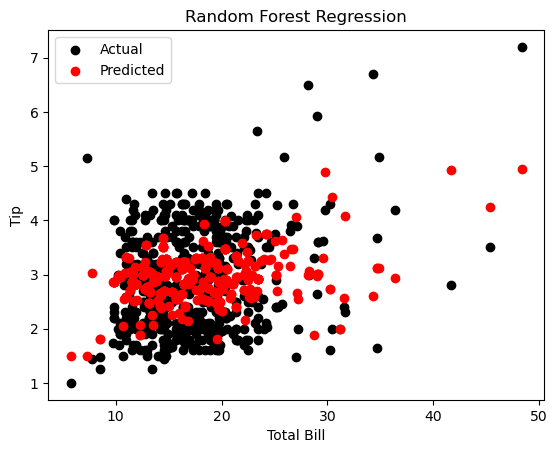

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'df' is your DataFrame
X = df[['total_bill']].values
y = df['tip'].values

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test_rf = train_test_split(X, y, test_size=0.25, random_state=0)

# Create and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the values
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

# Print the metrics
print('Mean Absolute Error:', mae_rf)
print('Mean Squared Error:', mse_rf)
print('R-squared (R2) Score:', r2_rf)

# Visualize the results
plt.scatter(X_test, y_test_rf, color='black', label='Actual')
plt.scatter(X_test, y_pred_rf, color='red', label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Random Forest Regression')
plt.legend()
plt.show()


### Evaluation Metrics

In [122]:
# Calculate and print the mean absolute error (MAE)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae_rf}")

# Calculate and print the mean squared error (MSE)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse_rf}")

# Calculate and print the R-squared (R^2) score
r2_rf = r2_score(y_test_rf, y_pred_rf)
print(f"R-squared (R^2) Score: {r2_rf}")


Mean Absolute Error (MAE): 0.8151421737063137
Mean Squared Error (MSE): 0.9687686446005547
R-squared (R^2) Score: -0.0862791859528329


### Performance Metrics Comparision

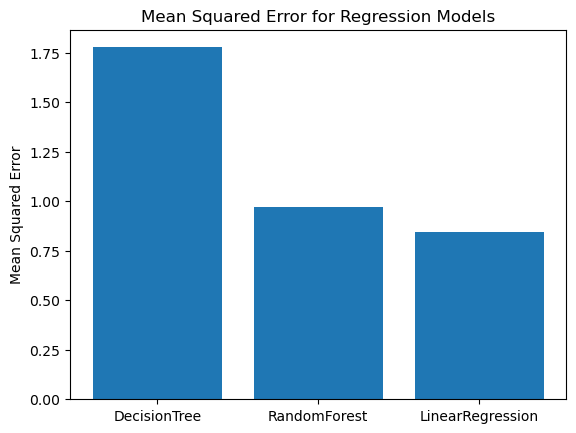

In [123]:
import matplotlib.pyplot as plt

# Calculate performance metrics for each model
mse_dt = mean_squared_error(y_test_dt, y_pred_dt)  # Replace with actual predictions
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)

mae_dt = mean_absolute_error(y_test_dt, y_pred_dt)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)

r2_dt = r2_score(y_test_dt, y_pred_dt)
r2_rf = r2_score(y_test_rf, y_pred_rf)
r2_lr = r2_score(y_test_lr, y_pred_lr)

# Create a bar plot for Mean Squared Error
labels = ['DecisionTree', 'RandomForest', 'LinearRegression']
mse_values = [mse_dt, mse_rf, mse_lr]

plt.bar(labels, mse_values)
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Regression Models')
plt.show()


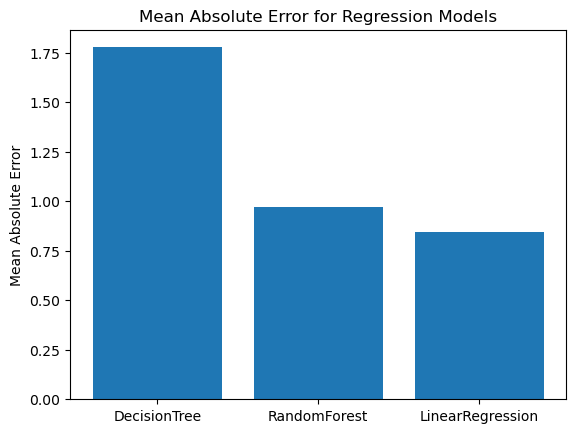

In [124]:
labels = ['DecisionTree', 'RandomForest', 'LinearRegression']
mae_values = [mae_dt, mae_rf, mae_lr]

plt.bar(labels, mse_values)
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Regression Models')
plt.show()

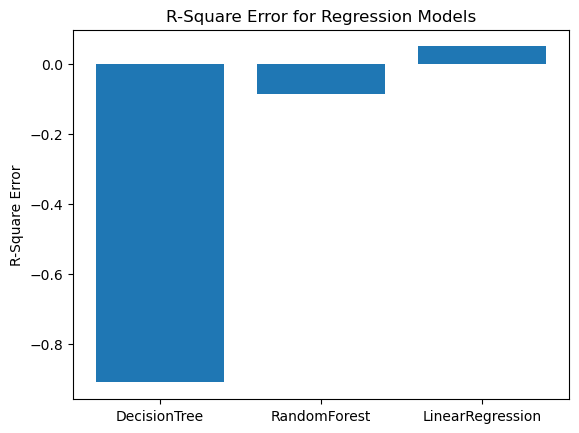

In [125]:
labels = ['DecisionTree', 'RandomForest', 'LinearRegression']
r2_values = [r2_dt, r2_rf, r2_lr]

plt.bar(labels, r2_values)
plt.ylabel('R-Square Error')
plt.title('R-Square Error for Regression Models')
plt.show()

In [126]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a simple Ridge Regression model
model = make_pipeline(PolynomialFeatures(degree=8), Ridge(alpha=0.1))

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


# Learning curve visualization
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

Training MSE: 0.7987420730065509
Testing MSE: 0.8493772371784963
Training R^2: 0.049889541238322566
Testing R^2: 0.0867556279864028


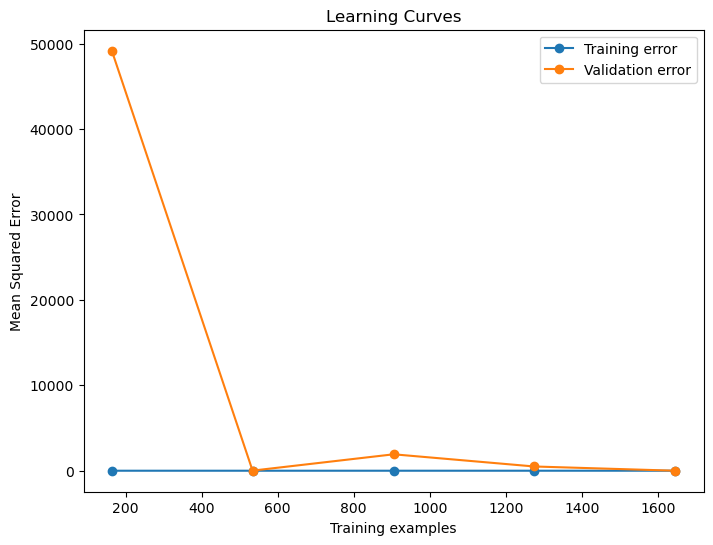

In [127]:
# Evaluation metrics
print("Training MSE:", mean_squared_error(y_train, y_pred_train))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test))
print("Training R^2:", r2_score(y_train, y_pred_train))
print("Testing R^2:", r2_score(y_test, y_pred_test))


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation error')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.show()

### Error Plots

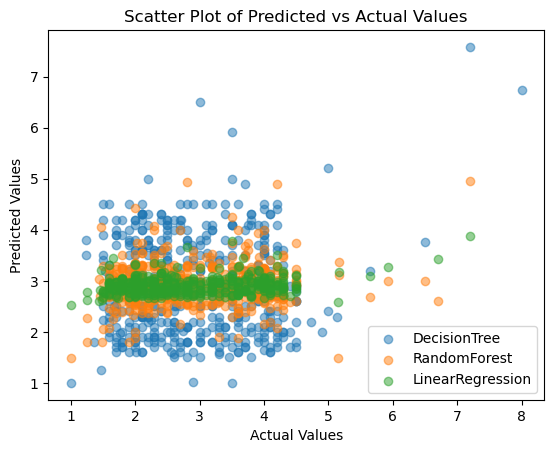

In [128]:
plt.scatter(y_test_dt, y_pred_dt, label='DecisionTree', alpha=0.5)
plt.scatter(y_test_rf, y_pred_rf, label='RandomForest', alpha=0.5)
plt.scatter(y_test_lr, y_pred_lr, label='LinearRegression', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()


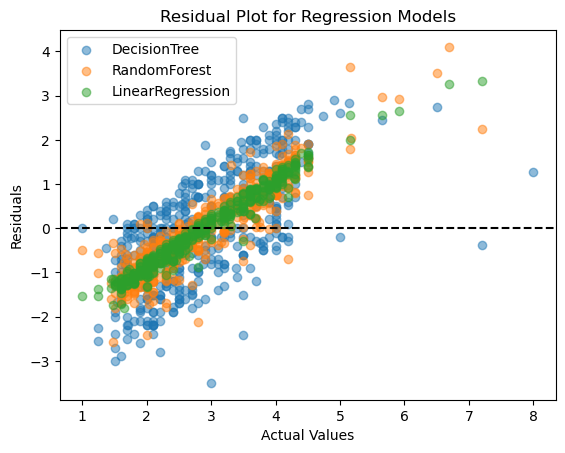

In [129]:
residual_dt = y_test_dt - y_pred_dt
residual_rf = y_test_rf - y_pred_rf
residual_lr = y_test_lr - y_pred_lr

plt.scatter(y_test_dt, residual_dt, label='DecisionTree', alpha=0.5)
plt.scatter(y_test_rf, residual_rf, label='RandomForest', alpha=0.5)
plt.scatter(y_test_lr, residual_lr, label='LinearRegression', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('Residual Plot for Regression Models')
plt.show()


### KNN

Mean Squared Error: 1.06
R-squared (R2) Score: -0.14


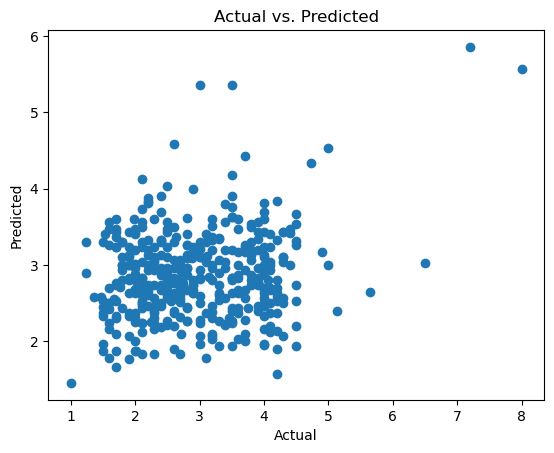

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Assuming 'tip' is your target variable for regression
X = df[['total_bill', 'sex_encoded', 'smoker_encoded', 'day_encoded', 'time_encoded', 'size']]
y = df['tip']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of nearest neighbors (K)
K = 3

# Create a k-NN regressor with K neighbors
knn = KNeighborsRegressor(n_neighbors=K)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
